# Tensorflow

*This worksheet was originally designed by [Erin George](https://www.math.ucla.edu/~egeo/) (Department of Mathematics, UCLA). It has been subsequently revised by later TAs and instructors.*

Today, we're going to get some practice with Tensorflow.  This discussion is split in two parts.  In the first part, we're going to design a neural network together to solve a problem.  In the second part, we're going to poke at our neural network to see how we can improve it.

## Our Problem

We will be working with the the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset again!

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

Again, I like to look at the data set first.  Let's pick a different number this time.

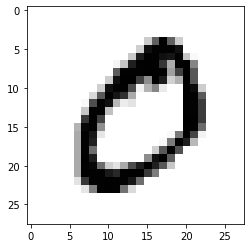

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:], cmap='binary')
plt.show()

Again, our data has this shape:

In [3]:
x_train.shape

(60000, 28, 28)

## Making a Neural Network

Let's make a simple neural network to classify the numbers here.  We'll make a convolutional neural network.

In [20]:
model = keras.models.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape = (28,28)),
    keras.layers.Conv2D(2, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 30, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'softmax'),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 2)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 338)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                10170     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
__________________________________________________

The first layer here reshapes the data.  Each point in our data is a 2D grid of numbers (a 2D tensor), but convolutional layers want a 2D grid of *vectors* (a 3D tensor).  So we have the reshape layer fix this, adding a final dimension of length 1.  We assign an `input_shape` to the first layer so our model knows the expected size of the input data.  The `input_shape` of the other layers is not needed because it can be inferred by the previous.

As before, let's make our validation set.

In [5]:
from sklearn.model_selection import train_test_split

x_train2, x_valid, y_train2, y_valid = train_test_split(x_train, y_train)

Then, we can build and train our model.

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train2, 
                    y_train2, 
                    epochs=5,
                    validation_data=(x_valid, y_valid))

Epoch 1/5
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0022 - accuracy: 0.4582 - val_loss: 1.9233 - val_accuracy: 0.5375
Epoch 2/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9173 - accuracy: 0.5433 - val_loss: 1.9065 - val_accuracy: 0.5543
Epoch 3/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8760 - accuracy: 0.5849 - val_loss: 1.8361 - val_accuracy: 0.6249
Epoch 4/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8356 - accuracy: 0.6253 - val_loss: 1.8453 - val_accuracy: 0.6155
Epoch 5/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8227 - accuracy: 0.6383 - val_loss: 1.8186 - val_accuracy: 0.6423


The accuracy we get is somewhere around 0.64 on the training set and on the validation set.  The exact number will vary, since there's some randomness involved.

Can we do better?  The answer is, yes!  As you should be aware by now, this isn't particularly good accuracy.

For the rest of the discussion, take the time to poke around this model and see if you can produce a better one.  Remember, don't look at the test data at the end.  Just stick with the validation set to evaluate the model.  It's okay if your validation set changes from run to run, so long as the test set is kept entirely separate.

Some advice on how to look for a better model:
- Try a bunch of things!  You'll never know what works!  Also, keep in mind that these can be *very* finicky.  Suppose you make one change, A, and see that it makes your model get worse.  You undo the change and try a different change, B, that also makes your model worse.  It's very possible that if you do A and B *together* you'll get a better than what you had!  It's weird that way.
- That being said, if you make a change and you do *better*, you should think about keeping it!  You might undo it a bit as you change more, but it's good to have the best model you've made so far as your current baseline.
- You might want to run your model multiple times when you change things!  That way you know you didn't just get lucky if it looked good or unlucky if it looked bad/the same.

And here are a list of things you might want to change:
- How long the model trains (the number of epochs)
- How many layers are in the model
- The types of each layer (dense, convolutional, pooling, etc.)
- How big each hidden layer is (in terms of number of nodes or the number of output filters)
- The activation functions.  A list is [here](https://www.tensorflow.org/api_docs/python/tf/keras/activations).  All you need to do is write the name in quotes (e.g. activation = 'elu').  Don't worry if you don't understand the difference between them, it's not too important right now.
- The optimizer we use.  A list is [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).  Some of them might give you an error.  If so, just try a different one.  Again, it's okay if you don't understand how the different optimizers work.  You don't need to!  Again, you can just type the name in quotes (e.g., optimizer='sgd').
- Consider doing a little more pre-processing on the data.  There are tips on how to pre-process data in the [worksheet](https://nbviewer.jupyter.org/urls/www.math.ucla.edu/~egeo/classes/spr21_pic16b-1/week5/ml_basics.ipynb) mentioned at the beginning.

There are still other things you can try.  If you want more ideas, you can ask me or you can look through the [Tensorflow keras API](https://www.tensorflow.org/api_docs/python/tf/keras/).  And, if you find something that works, consider sharing with the class!

Lastly, as a goal to aim towards: 96% accuracy or more is possible with just the changes above.  If you get there, see if you can do better!  There are some more complicated changes you can do (such as adding even more types of layers!) that can yield better accuracy, although you do not need to attempt those yourself.